(1323, 100)
(1323,)
(510, 100)
(510,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
19/19 [==============================] - 12s 278ms/step - loss: 0.0113 - val_loss: 0.0016
Epoch 2/60
19/19 [=========================

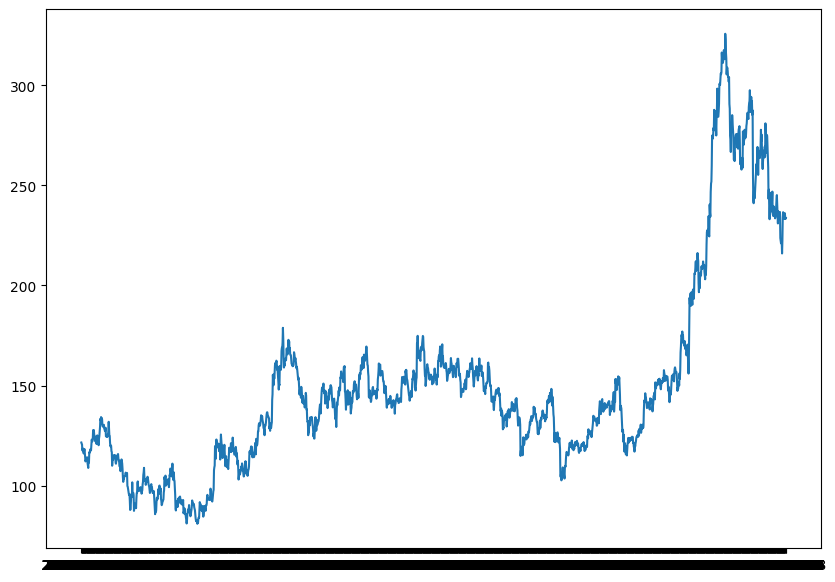

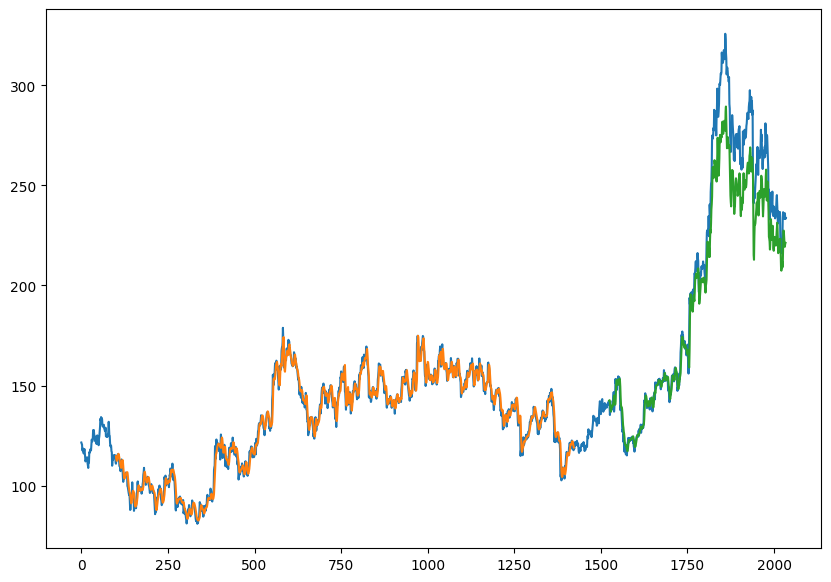

[0.5699924]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

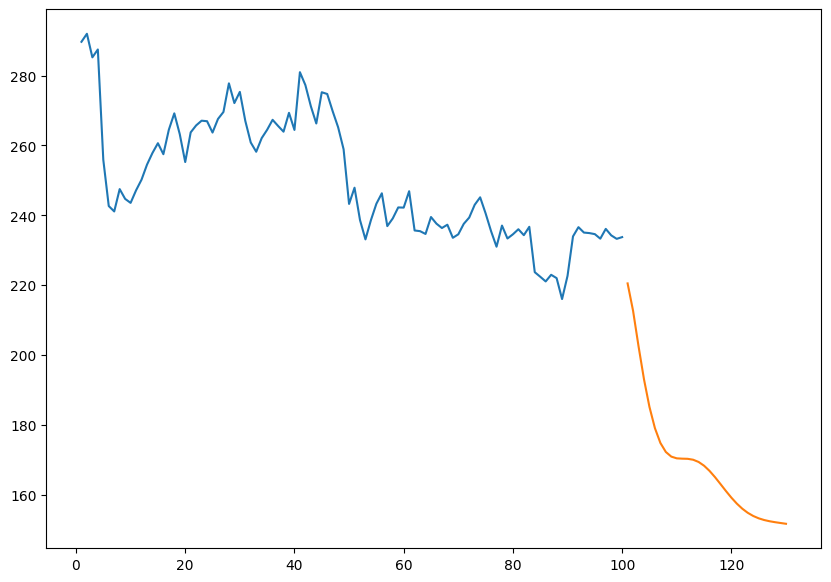

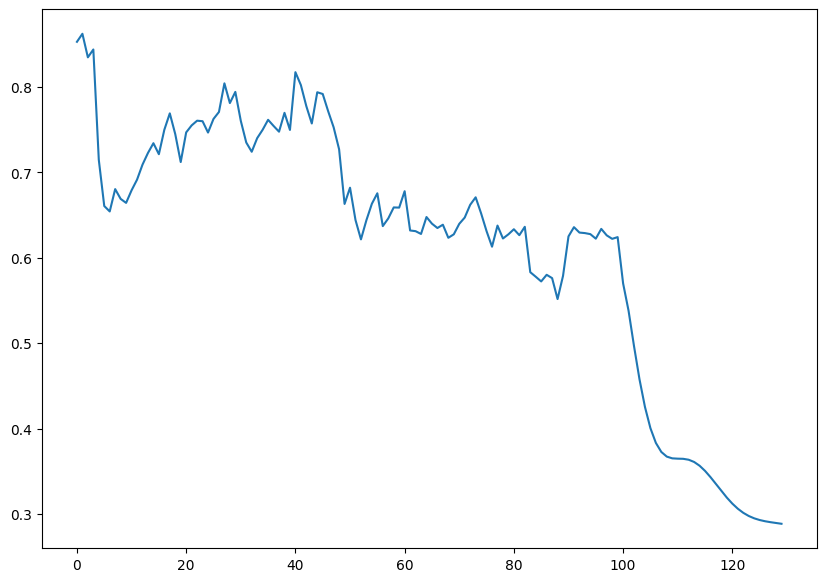

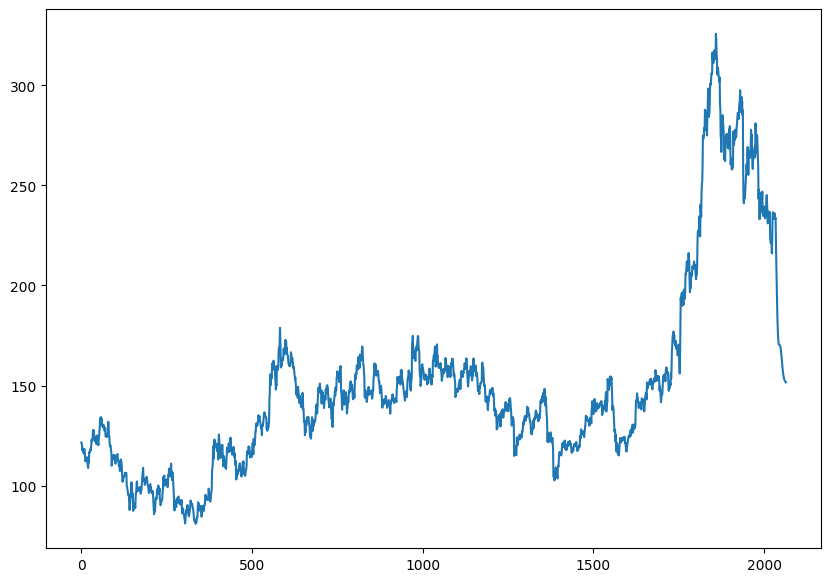

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


# In[2]:


tg = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")


# In[3]:


tg.head()


# In[4]:


tg.tail()


# In[5]:


tg.describe()


# In[6]:


NAN = [(c, tg[c].isnull().mean()*100) for c in tg]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN


# In[7]:


srt=tg.sort_values(by='Date')
srt.head()


# In[8]:


srt.reset_index(inplace=True)


# In[9]:


srt.head()


# In[10]:


plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])


# In[11]:


close_srt = srt['Close']
close_srt


# In[12]:


scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt


# In[13]:


train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]


# In[14]:


train_data.shape


# In[15]:


test_data.shape


# In[16]:


def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3----99  100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


# In[17]:


time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


# In[18]:


print(X_train.shape),print(y_train.shape)


# In[19]:


print(X_test.shape),print(y_test.shape)


# In[20]:


X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


# In[21]:


X_train


# In[22]:


X_test


# In[23]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# In[24]:


#creating the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


# In[25]:


model.summary()


# In[26]:


model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


# In[27]:


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


# In[28]:


train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


# In[29]:


import math
from sklearn.metrics import mean_squared_error


# In[30]:


math.sqrt(mean_squared_error(y_train,train_predict))


# In[31]:


math.sqrt(mean_squared_error(y_test,test_predict))


# In[38]:


look_back=100

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict

plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()





# In[39]:


len(test_data)


# In[41]:


pred_input=test_data[511:].reshape(1,-1)
pred_input.shape


# In[43]:


temp_input=list(pred_input)
temp_input=temp_input[0].tolist()


# In[44]:


temp_input


# In[47]:


lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):

        pred_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))

        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


# In[49]:


day_new = np.arange(1,101)
day_pred = np.arange(101,131)


# In[50]:


len(close_srt)


# In[52]:


plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_srt[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


# In[53]:


df3=close_srt.tolist()

df3.extend(lst_output)


# In[54]:


print(len(df3))


# In[55]:


plt.figure(figsize=(10,7))
plt.plot(df3[1935:])


# In[56]:


df3=scaler.inverse_transform(df3).tolist()


# In[57]:


plt.figure(figsize=(10,7))
plt.plot(df3)


# In[ ]: